#####   
# Recommendation System by KNN (Content-Based Filtering)
 - Purpose: Making a recommender to suggest movies

# 1) Loading Libraries

In [1]:
import numpy  as np
import pandas as pd
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',500)

from matplotlib import pyplot as plt
import seaborn as sns

import datetime
from   datetime import date

#####   
# 2) Loading and Exploring the Data

In [2]:
movies_details = pd.read_csv('movies.csv')
movies_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_details = pd.read_csv('ratings.csv')
ratings_details.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [4]:
df_merged = movies_details.merge( ratings_details, on='movieId')
df_merged.tail()

,movieId,title,genres,userId,rating,timestamp
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


#####   
# 3) Extracting New Columns

In [5]:
# Extracting Year from TimrStamp
year = []
for i in range( df_merged.shape[0] ):
    year.append(  datetime.datetime.fromtimestamp( df_merged['timestamp'][i] ).year  )
df_merged['timestamp_year'] = np.array(year)
df_merged.tail()

,movieId,title,genres,userId,rating,timestamp,timestamp_year
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2018
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,2018
100833,193585,Flint (2017),Drama,184,3.5,1537109805,2018
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,2018
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606,2018


#####   
# 4) Grouping & Combining
 - Group1: **Title** & **Rating (average)**  
 - Group2: **Title** & **Rating (count)** 
 - Combo : **Group1** + **Group2**

In [6]:
# Grouping by 'Title' & 'Rating' average
G = df_merged.copy()

G = G.groupby('title')['rating'].mean()
G = G.sort_values( ascending=False )

G_rating_mean = G.copy()
G_rating_mean

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [7]:
# Grouping by 'Title' & 'Rating' count
G = df_merged.copy()

G = G.groupby('title')['rating'].count()
G = G.sort_values( ascending=False )

G_rating_count = G.copy()
G_rating_count

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [8]:
# Combining the Groups
df_Grouped = pd.DataFrame() 

df_Grouped['rating_mean' ] = G_rating_mean
df_Grouped['rating_count'] = G_rating_count 

df_Grouped.tail()

,rating_mean,rating_count
title,,
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1
Jesus Christ Vampire Hunter (2001),0.5,1
Fullmetal Alchemist 2018 (2017),0.5,1


In [9]:
# Weighting the Rating
C = df_Grouped['rating_count'].copy()
Q = df_Grouped['rating_count'].copy().quantile(0.70)
R = df_Grouped['rating_mean' ].copy()
M = df_Grouped['rating_mean' ].copy().mean()

df_Grouped['weighted_rating' ] = np.round( ((R*C)+(M*Q))/(C+Q) ,2 )
df_Grouped.tail()

,rating_mean,rating_count,weighted_rating
title,,,
Don't Look Now (1973),0.5,1,2.92
Journey 2: The Mysterious Island (2012),0.5,1,2.92
Joe Dirt 2: Beautiful Loser (2015),0.5,1,2.92
Jesus Christ Vampire Hunter (2001),0.5,1,2.92
Fullmetal Alchemist 2018 (2017),0.5,1,2.92


#####   
# 5) EDA of the Combo

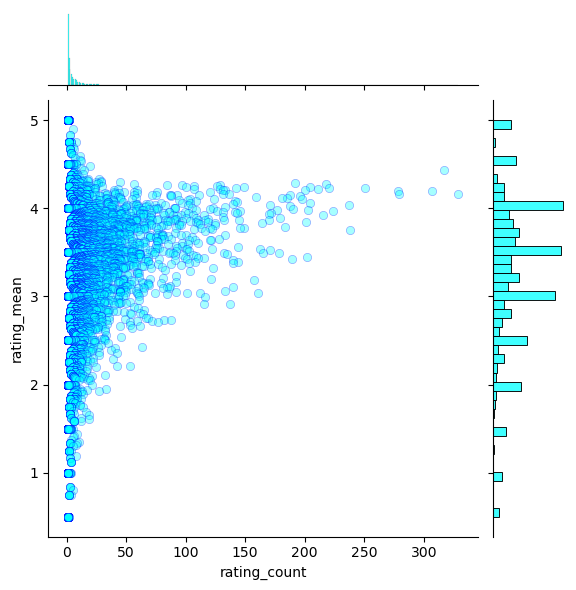

In [10]:
# jointplot
sns_plot = sns.jointplot( x='rating_count', y='rating_mean', data=df_Grouped, color='cyan', edgecolor='b', alpha=0.35 )
#sns_plot.savefig('jointplot.png')
plt.show()

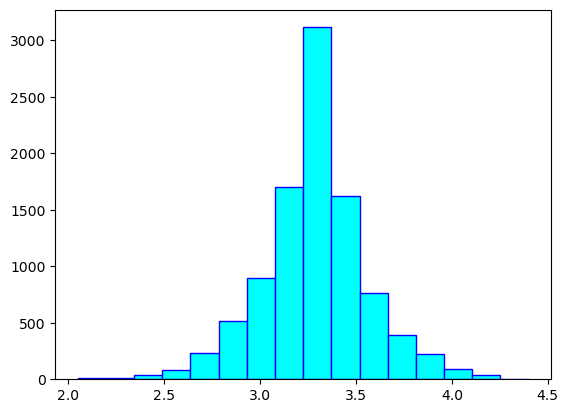

In [11]:
# Histogram
fig, ax = plt.subplots()
ax.hist( df_Grouped['weighted_rating' ], bins=16, linewidth=1, edgecolor='blue', facecolor='cyan' )
#fig.savefig('Histogram.png')
plt.show()

#####   
# 6) Pivot Table
 - Making **Pivot Table** of **Title** & **Rating**

In [12]:
# Making the Pivot Table of Title & Rating
df_Pivot      = df_merged.pivot_table(index='userId',columns='title',values='rating')
df_Pivot_Zero = df_Pivot.copy().fillna(0)
df_Pivot_Zero.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Hours (2016),13 Sins (2014),13 Tzameti (2005),13th (2016),"13th Warrior, The (1999)",1408 (2007),1492: Conquest of Paradise (1992),15 Minutes (2001),16 Blocks (2006),17 Again (2009),1776 (1972),18 Again! (1988),187 (One Eight Seven) (1997),1900 (Novecento) (1976),1941 (1979),1969 (1988),1984 (Nineteen Eighty-Four) (1984),2 Days in New York (2012),2 Days in Paris (2007),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2 Guns (2013),20 Dates (1998),20 Feet from Stardom (Twenty Feet from Stardom) (2013),20 Million Miles to Earth (1957),"20,000 Days on Earth (2014)","20,000 Leagues Under the Sea (1916)","20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001 Maniacs (2005),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),2046 (2004),2048: Nowhere to Run (2017),21 (2008),21 Grams (2003),21 Jump Street (2012),21 Up (1977),21 and Over (2013),22 Jump Street (2014),24 Hour Party People (2002),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Up (1985),28 Weeks Later (2007),3 Days to Kill (2014),3 Extremes (Three... Extremes) (Saam gaang yi) (2004),3 Idiots (2009),3 Ninjas (1992),3 Ninjas Kick Back (1994),3 Ninjas Knuckle Up (1995),3 Ninjas: High Noon On Mega Mountain (1998),3 Women (Three Women) (1977),3 dev adam (Three Giant Men) (1973),3-Iron (Bin-jip) (2004),30 Days of Night (2007),30 Minutes or Less (2011),300 (2007),3000 Miles to Graceland (2001),300: Rise of an Empire (2014),31 (2016),35 Up (1991),"39 Steps, The (1935)",3:10 to Yuma (1957),3:10 to Yuma (2007),4 Little Girls (1997),"4 Months, 3 Weeks and 2 Days (4 luni, 3 saptamâni si 2 zile) (2007)",40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 (2013),42 Up (1998),42nd Street (1933),47 Ronin (2013),48 Hrs. (1982),49 Up (2005),5 Centimeters per Second (Byôsoku 5 senchimêtoru) (2007),5 to 7 (2014),"5,000 Fingers of Dr. T, The (1953)",50 First Dates (2004),50/50 (2011),52 Pick-Up (1986),54 (1998),6 Days to Air: The Making of South Park (2011),61* (2001),"6th Day, The (2000)","6th Man, The (Sixth Man, The) (1997)",7 Days in Hell (2015),7 Faces of Dr. Lao (1964),"7th Voyage of Sinbad, The (1958)",8 1/2 (8½) (1963),8 Heads in a Duffel Bag (1997),8 Mile (2002),8 Seconds (1994),8 Women (2002),8 ½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999),800 Bullets (800 Balas) (2002),84 Charing Cross Road (1987),8MM (1999),9 (2009),9 1/2 Weeks (Nine 1/2 Weeks) (1986),9/11 (2002),96 Minutes (2011),964 Pinocchio (1991),99 francs (2007),9to5: Days in Porn (a.k.a. 9 to 5: Days in Porn) (2008),A Bad Moms Christmas (2017),A Christmas Story Live! (2017),A Cosmic Christmas (1977),A Detective Story (2003),A Dog's Purpose (2017),A Flintstones Christmas Carol (1994),A German Life (2016),A Home at the End of the World 

#####   
# 7) Making KNN

In [13]:
from scipy.sparse import csr_matrix
CSR_Matrix = csr_matrix(df_Pivot_Zero.T.values)

from sklearn.neighbors import NearestNeighbors
Model_KNN = NearestNeighbors( metric='cosine', algorithm='brute' )
Model_KNN.fit( CSR_Matrix )

NearestNeighbors(algorithm='brute', metric='cosine')

#####   
# 8) Recommending ( Ratings + KNN )
 - Finding the **Item of Interest** in the **Pivot Table**
 - Finding the **Neighbors** of **Item of Interest**  Using  **KNN**
 - **Recommending Neighbors**

In [14]:
#Item_of_Interest = 'Sin City (2005)'
Item_of_Interest = 'Harry Potter and the Chamber of Secrets (2002)'
#Item_of_Interest = 'Star Wars: Episode III - Revenge of the Sith (2005)'
#Item_of_Interest = 'Mummy, The (1999)'
#Item_of_Interest = 'X-Men (2000)' 
#Item_of_Interest = 'Hot Fuzz (2007)' 

# Finding the  Item of Interest  in the  Pivot Table Zero
xx = df_Pivot_Zero[Item_of_Interest]

# Finding the  Neighbors  of the  Item of Interest  Using  KNN
distance, indices = Model_KNN.kneighbors(xx.values.reshape(1,-1), n_neighbors=21 )

# Recommending Neighbors
new = pd.DataFrame()
new['Distance'] = np.round( list(distance[0]) ,3 )
new.index = list( df_Pivot_Zero.iloc[ :,list( indices[0] ) ].columns )

print('\nSuggestions for ',Item_of_Interest+':')
new.style.bar( subset=['Distance'], color='yellow' )



Suggestions for  Harry Potter and the Chamber of Secrets (2002):


,Distance
Harry Potter and the Chamber of Secrets (2002),0.000000
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.220000
Harry Potter and the Prisoner of Azkaban (2004),0.231000
Harry Potter and the Goblet of Fire (2005),0.284000
Harry Potter and the Order of the Phoenix (2007),0.329000
Pirates of the Caribbean: Dead Man's Chest (2006),0.414000
Spider-Man (2002),0.418000
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.421000
Harry Potter and the Half-Blood Prince (2009),0.427000
"Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)",0.434000


#####   

#####   